# Clean and analyse employee exit survey:


In this project we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Survey data can TAFE exit can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and for DETE, it can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Survey data is also attached in the same repository.

Our stakeholder have found that employees are resigning and as a data analyst, need to answer below questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Exploring Dataset:

In [10]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

#### `dete_survey.csv`

In [9]:
print (dete_survey.columns)
print (dete_survey.shape)
print (dete_survey.info())

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

`dete_survey.csv` contains 822 rows and 56 columns. We can see only the `ID` column is numeric, rest column types are either `bool` or `object`. We have got so `null` values in this dataset. We have also got so many factors related to employee. Factors inclue health, family, job, sector etc . So its clear that various factors have been considered in preparing this survey.

#### `tafe_survey.csv`

In [13]:
print(tafe_survey.columns)


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [14]:
print(tafe_survey.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [16]:
print(tafe_survey.shape)
tafe_survey.head()

(702, 72)


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


`tafe_survey.csv` has more number of columns that previous dataset. It has 702 rows and 72 columns.`Coumn names` are very large in this dataset. Only the `Record ID` column is `float`, remaining column data type is `object`

In [17]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


`dete_survey` has many column values as `Not Stated`, we have to change them to **NA** because those values are not provided. So we need to re-read the files so that we can do the replacement then and there.

#### Reading `dete_survey.csv` again:

In [18]:
dete_survey = pd.read_csv("dete_survey.csv",na_values="Not Stated")

In [32]:
pd.set_option('display.max_columns',60)
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Okay! so in the row second we can see that *Not Stated* is replaced with *NaN* successfully in dete_survey dataframe.

### Dropping unnecessary columns:

In [23]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [34]:
dete_survey.shape

(822, 56)

In [38]:
dete_survey_columns = dict(zip(np.arange(0,56),dete_survey.columns))
dete_survey_columns

{0: 'ID',
 1: 'SeparationType',
 2: 'Cease Date',
 3: 'DETE Start Date',
 4: 'Role Start Date',
 5: 'Position',
 6: 'Classification',
 7: 'Region',
 8: 'Business Unit',
 9: 'Employment Status',
 10: 'Career move to public sector',
 11: 'Career move to private sector',
 12: 'Interpersonal conflicts',
 13: 'Job dissatisfaction',
 14: 'Dissatisfaction with the department',
 15: 'Physical work environment',
 16: 'Lack of recognition',
 17: 'Lack of job security',
 18: 'Work location',
 19: 'Employment conditions',
 20: 'Maternity/family',
 21: 'Relocation',
 22: 'Study/Travel',
 23: 'Ill Health',
 24: 'Traumatic incident',
 25: 'Work life balance',
 26: 'Workload',
 27: 'None of the above',
 28: 'Professional Development',
 29: 'Opportunities for promotion',
 30: 'Staff morale',
 31: 'Workplace issue',
 32: 'Physical environment',
 33: 'Worklife balance',
 34: 'Stress and pressure support',
 35: 'Performance of supervisor',
 36: 'Peer support',
 37: 'Initiative',
 38: 'Skills',
 39: 'Coach

As we can see above in dataset `dete_survey` columns from 28 to 48 are not of our use for analysis. So we can drop them to proceed further. Let's check columns for `tafe_survey` 

In [39]:
print(tafe_survey.shape)

(702, 72)


In [40]:
tafe_survey_columns = dict(zip(np.arange(0,72),tafe_survey.columns))
tafe_survey_columns

{0: 'Record ID',
 1: 'Institute',
 2: 'WorkArea',
 3: 'CESSATION YEAR',
 4: 'Reason for ceasing employment',
 5: 'Contributing Factors. Career Move - Public Sector ',
 6: 'Contributing Factors. Career Move - Private Sector ',
 7: 'Contributing Factors. Career Move - Self-employment',
 8: 'Contributing Factors. Ill Health',
 9: 'Contributing Factors. Maternity/Family',
 10: 'Contributing Factors. Dissatisfaction',
 11: 'Contributing Factors. Job Dissatisfaction',
 12: 'Contributing Factors. Interpersonal Conflict',
 13: 'Contributing Factors. Study',
 14: 'Contributing Factors. Travel',
 15: 'Contributing Factors. Other',
 16: 'Contributing Factors. NONE',
 17: 'Main Factor. Which of these was the main factor for leaving?',
 18: 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
 19: 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
 20: 'InstituteViews. Topic:3. I was given adequate opportunities for per

In above column list we can see from `column 17` to `column 65` all column values are useless for us. So we should drop them as well. So:
* Dropping column 28 to 48(including) in dete_survey dataset
* Dropping column 17 to 65(including) in tafe_survey dataset

In [41]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[27:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [42]:
dete_survey_updated.shape

(822, 34)

In [44]:
tafe_survey_updated.shape

(702, 23)

## Analysing columns:

Since both of our datasets contain so many column names, so its become important for us to understand each column and rename column name where ever necessary. It is also important because *we need to fetch our final response by taking both the survey results into consideration*.

In [45]:
dete_cols = dict(zip(np.arange(0,34),dete_survey_updated.columns))
tafe_cols = dict(zip(np.arange(0,23),tafe_survey_updated.columns))


In [46]:
dete_cols

{0: 'ID',
 1: 'SeparationType',
 2: 'Cease Date',
 3: 'DETE Start Date',
 4: 'Role Start Date',
 5: 'Position',
 6: 'Classification',
 7: 'Region',
 8: 'Business Unit',
 9: 'Employment Status',
 10: 'Career move to public sector',
 11: 'Career move to private sector',
 12: 'Interpersonal conflicts',
 13: 'Job dissatisfaction',
 14: 'Dissatisfaction with the department',
 15: 'Physical work environment',
 16: 'Lack of recognition',
 17: 'Lack of job security',
 18: 'Work location',
 19: 'Employment conditions',
 20: 'Maternity/family',
 21: 'Relocation',
 22: 'Study/Travel',
 23: 'Ill Health',
 24: 'Traumatic incident',
 25: 'Work life balance',
 26: 'Workload',
 27: 'Gender',
 28: 'Age',
 29: 'Aboriginal',
 30: 'Torres Strait',
 31: 'South Sea',
 32: 'Disability',
 33: 'NESB'}

In [47]:
tafe_cols

{0: 'Record ID',
 1: 'Institute',
 2: 'WorkArea',
 3: 'CESSATION YEAR',
 4: 'Reason for ceasing employment',
 5: 'Contributing Factors. Career Move - Public Sector ',
 6: 'Contributing Factors. Career Move - Private Sector ',
 7: 'Contributing Factors. Career Move - Self-employment',
 8: 'Contributing Factors. Ill Health',
 9: 'Contributing Factors. Maternity/Family',
 10: 'Contributing Factors. Dissatisfaction',
 11: 'Contributing Factors. Job Dissatisfaction',
 12: 'Contributing Factors. Interpersonal Conflict',
 13: 'Contributing Factors. Study',
 14: 'Contributing Factors. Travel',
 15: 'Contributing Factors. Other',
 16: 'Contributing Factors. NONE',
 17: 'Gender. What is your Gender?',
 18: 'CurrentAge. Current Age',
 19: 'Employment Type. Employment Type',
 20: 'Classification. Classification',
 21: 'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
 22: 'LengthofServiceCurrent. Length of Service at current workplace (in years)'}

#### For reference and quick comparison:
creating a dataframe containing columns from both the updated surveys.

In [49]:
col_df = pd.DataFrame({'dete_cols':pd.Series(dete_cols),'tafe_cols':pd.Series(tafe_cols)})

In [50]:
col_df

,dete_cols,tafe_cols
0,ID,Record ID
1,SeparationType,Institute
2,Cease Date,WorkArea
3,DETE Start Date,CESSATION YEAR
4,Role Start Date,Reason for ceasing employment
5,Position,Contributing Factors. Career Move - Public Sec...
6,Classification,Contributing Factors. Career Move - Private Se...
7,Region,Contributing Factors. Career Move - Self-emplo...
8,Business Unit,Contributing Factors. Ill Health
9,Employment Status,Contributing Factors. Maternity/Family


* ID and Record ID are same columns
* SeparationType and Reason for ceasing employment are same columns
* Cease Date and CESSATION YEAR provide same information
* Gender and Gender. What is your Gender? provide same information
* Age and CurrentAge. Current Age provide same information.

There are so many `common` columns in both the surveys which corresponds to same data but just names are different.

# Renaming and standardizing column names:

In [51]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload', 'Gender', 'Age',
       'Aboriginal', 'Torres Strait', 'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [53]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ","_").str.strip()

In [54]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload', 'gender', 'age',
       'aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb'],
      dtype='object')

In [55]:
# renaming column names in tafe_survey as per dete_survey:
mapping = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

tafe_survey_updated.rename(mapping,inplace=True,axis=1)

In [57]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In the above step, we updated few column names in `tafe_survey_updated` dataset so as to match with `dete_survey_updated`. Below is the mapping list:
* 'Record ID': 'id'
* 'CESSATION YEAR': 'cease_date'
* 'Reason for ceasing employment': 'separationtype'
* 'Gender. What is your Gender?': 'gender'
* 'CurrentAge. Current Age': 'age'
* 'Employment Type. Employment Type': 'employment_status'
* 'Classification. Classification': 'position'
* 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'

Since we need to understand
>    "**why employees are resigning?**"

We should focus on "resignation" or something like "resignation" as separation reason from both datasets.

In [61]:
tafe_survey_updated["separationtype"].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [63]:
dete_survey_updated["separationtype"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

### Unifying seperationtype in dete_survey_updated dataset:

In [66]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]

In [67]:
dete_survey_updated["separationtype"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation', 'Age Retirement', 'Other', 'Contract Expired',
       'Termination'], dtype=object)

# Filtering dataset:
Since we need to do the analysis on **resignations**, let's collect data only for `separationtype ="Resignation"` in both the datasets.

In [68]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"]=="Resignation"]

In [72]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"]

In [74]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [75]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [77]:
dete_resignations["cease_date"].unique()

array(['05/2012', '07/2012', '2012', '2013', '2010', '07/2013', '06/2013',
       '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013',
       '12/2013', '11/2013', nan, '07/2006'], dtype=object)

In [82]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [85]:
dete_resignations["cease_date"] = dete_resignations.loc[:,"cease_date"].copy().str.split("/").str[-1]

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
dete_resignations["cease_date"].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

So till now, we are ready with two datasets containing information about the employees who resigned from the company.
Our next step will be to work on the reasons and doing further analysis.

# Creating a new column:

Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

**End goal:** `Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?`

The tafe_resignations dataframe already contains a "service" column, which we renamed to **institute_service**(telss the duration for which they worked)

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [94]:
dete_resignations["institute_service"] =  dete_resignations["cease_date"] -dete_resignations["dete_start_date"] 

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [96]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Identifying dissatisfied employees:

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_resignations:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
    
2. dafe_resignations:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload
```
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:
```

    * `True`: indicates a person resigned because they were dissatisfied in some way
    * `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
    * `NaN`: indicates the value is missing

In [99]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [100]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [101]:
#function to return True/False corresponding to passed value:
def return_tf(x):
    if pd.isnull(x):
        return np.nan
    elif x=="-":
        return False
    else:
        return True

In [102]:
#adding new column 'dissatisfied' to tafe_resignations dataset
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Job Dissatisfaction","Contributing Factors. Dissatisfaction"]].applymap(return_tf).any(axis=1,skipna=False)

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
tafe_resignations_up = tafe_resignations.copy()

In [104]:
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [106]:
dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].describe()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
count,311,311,311,311,311,311,311,311,311
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False
freq,270,282,305,278,297,293,288,243,284


As we can see in the second row above with index `unique` that all values are **2** indicating that these columns contain only two types of values and either values are `True` or `False`, so we need to not to convert them into True or Falase, like we did for previous dataset. Just we will use these existing columns to update new column named `dissatisfied` 

In [107]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].any(axis=1,skipna=False)

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [108]:
dete_resignations_up = dete_resignations.copy()

In [109]:
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

dete_resignations_up.head()

# Combining both dataset:

In [111]:
#Adding new column
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"


In [112]:
#combining both datasets
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [118]:
print(dete_resignations_up.shape)
print(tafe_resignations_up.shape)
print(combined.shape)

(311, 37)
(340, 25)
(651, 52)


In [124]:
combined.notna().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
work_location                                                                311
dissatisfaction_with_the_dep

In [125]:
# drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500,axis=1).copy()

In [126]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


So we now have a combined dataset with 10 columns.

# Cleaning institute_service columns:
We will map values in this column to `career stage`, as below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [129]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [131]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [136]:
#New: Less than 3 years at a company
#Experienced: 3-6 years at a company
#Established: 7-10 years at a company
#Veteran: 11 or more years at a company
def career_stage(x):
    if pd.isna(x):
        return np.nan
    elif x<3:
        return "New"
    elif 3<=x<7:
        return "Experienced"
    elif 7<=x<11:
        return "Established"
    else:
        return "Veteran"
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career_stage)

In [137]:
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [138]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation,7.0,Established
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation,18.0,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation,3.0,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation,15.0,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation,3.0,Experienced


In [140]:
combined_updated.isna().sum()

age                     55
cease_date              16
dissatisfied             8
employment_status       54
gender                  59
id                       0
institute                0
institute_service       88
position                53
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

# Performing initial analysis:

In [142]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [143]:
combined_updated["dissatisfied"].fillna(value=False,inplace=True)

In [144]:
combined_updated["dissatisfied"].value_counts(dropna=True)

False    411
True     240
Name: dissatisfied, dtype: int64

In [146]:
#plotting graph for dissatisfied employees for each category
category_dis = pd.pivot_table(combined_updated, index="service_cat", values="dissatisfied")

In [149]:
category_dis

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


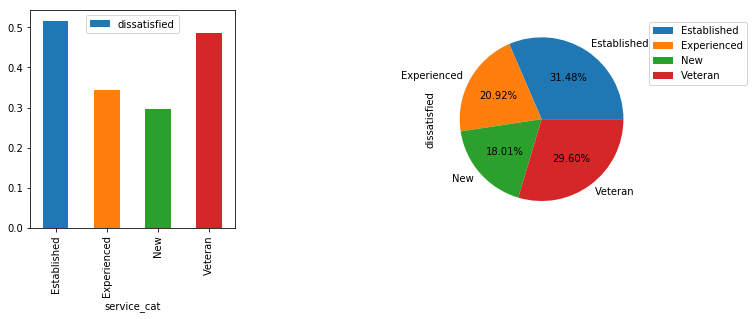

In [183]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
category_dis.plot(kind="pie",y="dissatisfied",ax=ax2, autopct='%.2f%%')
category_dis.plot(kind="bar",y="dissatisfied",ax=ax1)
fig.subplots_adjust(wspace=1)
plt.legend(bbox_to_anchor=(1, 1))

As we can see from the above graphs, employees who are resigning are `31.5%` established employees ie they have `7 to 11 years` of experience. While veteran employees with more than `11 years` of experience are `29%`. So established are resigning more than veterans due to some kind of dissatisfaction.